In [9]:
import pandas as pd
notas = pd.read_csv("./ml-latest-small/ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


                                                            ANALISANDO AS NOTAS EM GERAL

In [10]:
notas.columns =['usuarioId', 'filmeId', 'nota', 'tempo']
notas.head()


,usuarioId,filmeId,nota,tempo
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [12]:
notas['nota'].mean()

3.501556983616962

In [13]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [14]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

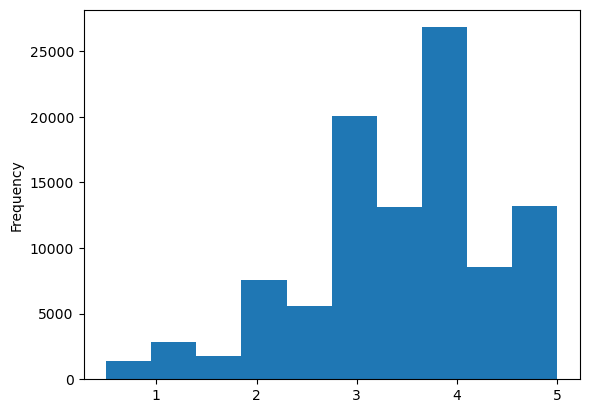

In [15]:
notas.nota.plot(kind='hist')

In [16]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

c:\Users\Diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

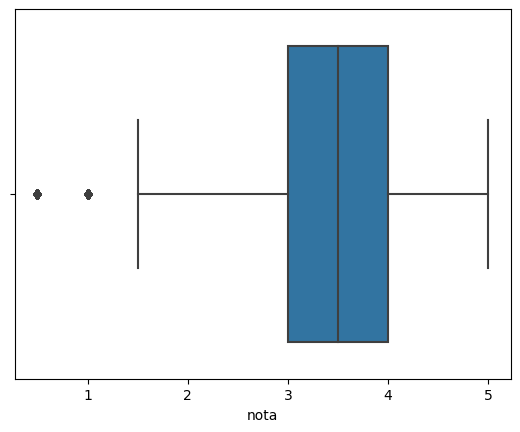

In [17]:
import seaborn as sns

sns.boxplot(notas.nota)

                                                            CARREGAMENTO DA LISTA DE FILMES

In [19]:
filmes = pd.read_csv("./ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
notas.head()

,usuarioId,filmeId,nota,tempo
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


                                                            Analisando algumas notas especificas por filmes 

In [30]:
notas.query('filmeId==1')

,usuarioId,filmeId,nota,tempo
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [36]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

                                                        TIRANDO A MÉDIA DOS FILMES 

                        AGRUPAMOS TODAS A NOTAS PARA TIRAR A MÉDIA E AGRUPAMOS A COLUNAS DOS NOMES DOS FILMES 

In [39]:
media_por_filmes = notas.groupby('filmeId').mean().nota
media_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

                                    UTILIZANDO GRAFICO PARA TIRAR A MEDIA DAS NOTAS DOS FILMES E COM MAIS DETALHES
                                  

<AxesSubplot:ylabel='Frequency'>

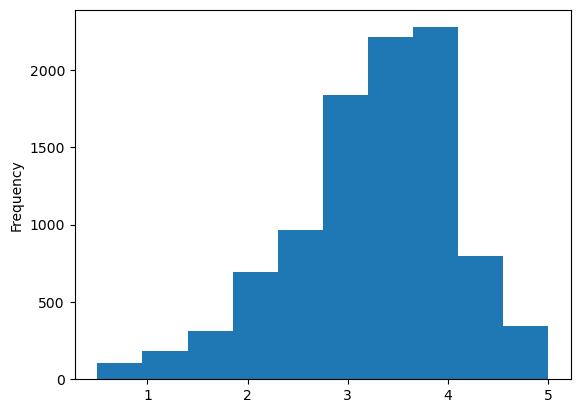

In [41]:
media_por_filmes.plot(kind='hist')

c:\Users\Diego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

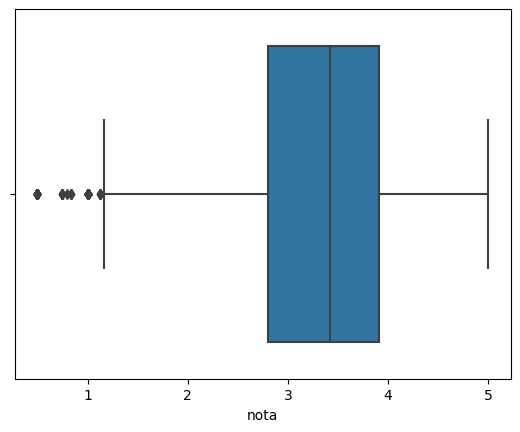

In [42]:
sns.boxplot(media_por_filmes)

In [43]:
media_por_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

                         A PALAVRA "BINS" SERVE PARA IDENTIFICAR QUANTAS COLUNAS O GRAFIO VAI TER

c:\Users\Diego\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Grafico 2')]

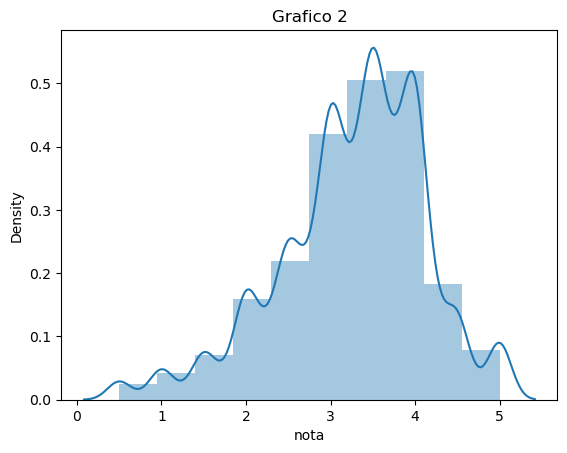

In [50]:
sns.distplot(media_por_filmes , bins=10).set(title = "Grafico 2")

Text(0.5, 1.0, 'Histograma das médias dos filmes')

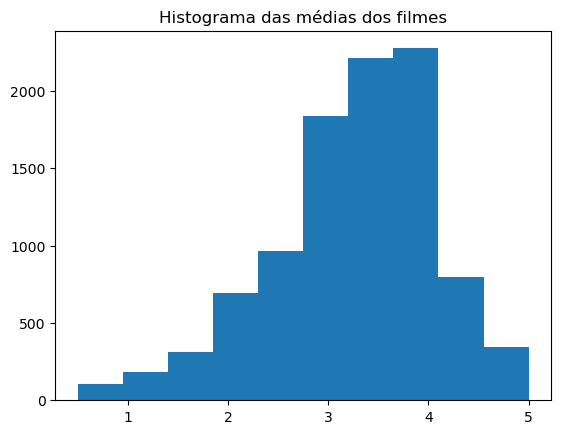

In [48]:
import matplotlib.pyplot as plt
plt.hist(media_por_filmes)
plt.title("Histograma das médias dos filmes")